# load packages and data

In [53]:
%reset -f

import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import numpy             as np

from scipy.stats                            import t
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from datetime                               import datetime
from statsmodels.tsa.stattools              import adfuller
from statsmodels.tsa.arima.model            import ARIMA

# set up seaborn parameters for plotting

In [54]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

# load data

In [55]:
df = pd.read_excel('cons_conf.xlsx')

In [56]:
df.head()

,month,University of Michigan consumer confidence index
0,1978-01-01,83.7
1,1978-02-01,84.3
2,1978-03-01,78.8
3,1978-04-01,81.6
4,1978-05-01,82.9


# define time variable

In [57]:
df['date'] = pd.to_datetime(df['month'])
df = df.set_index('date')
df.drop(['month'], axis=1, inplace=True)
df.head()

,University of Michigan consumer confidence index
date,
1978-01-01,83.7
1978-02-01,84.3
1978-03-01,78.8
1978-04-01,81.6
1978-05-01,82.9


# important!!! : rename the variable you want to test as "y"

In [58]:
df = df.rename(columns={"University of Michigan consumer confidence index": "y"})

In [59]:
df.columns

Index(['y'], dtype='object')

# lineplot to eyeball seasonal unit root

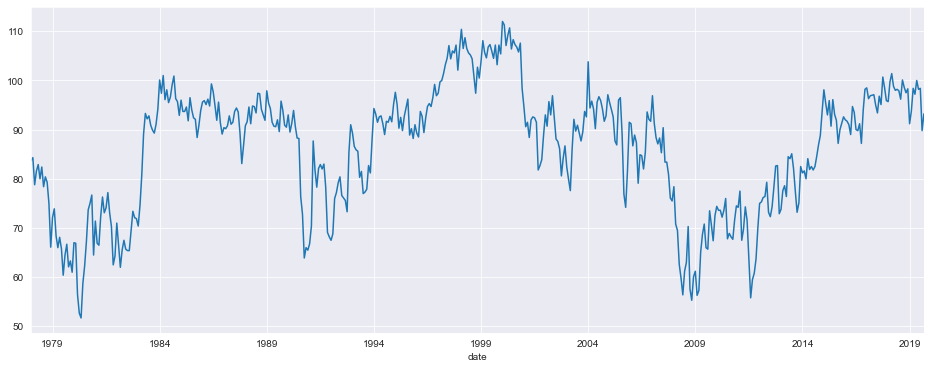

In [60]:
df['y'].plot()
plt.show()

# run the following function for the HEGY12 test

In [61]:
def HEGY12(df):
    r32 = np.sqrt(3)/2
    r3  = np.sqrt(3)

    df['y1'] = df['y'].shift(1) + df['y'].shift(2) + df['y'].shift(3) + df['y'].shift(4) + df['y'].shift(5) + df['y'].shift(6) + df['y'].shift(7) + df['y'].shift(8) + df['y'].shift(9) + df['y'].shift(10) + df['y'].shift(11) + df['y'].shift(12)

    df['y2'] = -1 * df['y'].shift(1) + df['y'].shift(2)  - df['y'].shift(3) + df['y'].shift(4) - df['y'].shift(5)  + df['y'].shift(6) - df['y'].shift(7)+ df['y'].shift(8)  - df['y'].shift(9) + df['y'].shift(10) - df['y'].shift(11) + df['y'].shift(12)

    df['y3'] = -1 * df['y'].shift(2) + df['y'].shift(4)  - df['y'].shift(6) + df['y'].shift(8) - df['y'].shift(10) + df['y'].shift(12)

    df['y4'] = -1 * df['y'].shift(1) + df['y'].shift(3) - df['y'].shift(5) + df['y'].shift(7) - df['y'].shift(9) + df['y'].shift(11)

    df['y5'] = -0.5 * (df['y'].shift(1)  + df['y'].shift(2)  - 2 * df['y'].shift(3)
                     + df['y'].shift(4)  + df['y'].shift(5)  - 2 * df['y'].shift(6)
                     + df['y'].shift(7)  + df['y'].shift(8)  - 2 * df['y'].shift(9)
                     + df['y'].shift(10) + df['y'].shift(11) - 2 * df['y'].shift(12))

    df['y6'] = r32 * (df['y'].shift(1)  - df['y'].shift(2) 
                    + df['y'].shift(4)  - df['y'].shift(5) 
                    + df['y'].shift(7)  - df['y'].shift(8) 
                    + df['y'].shift(10) - df['y'].shift(11))

    df['y7'] = 0.5 * (df['y'].shift(1)  - df['y'].shift(2)  - 2 * df['y'].shift(3)
                    - df['y'].shift(4)  + df['y'].shift(5)  + 2 * df['y'].shift(6)
                    + df['y'].shift(7)  - df['y'].shift(8)  - 2 * df['y'].shift(9)
                    - df['y'].shift(10) + df['y'].shift(11) + 2 * df['y'].shift(12))

    df['y8'] = -1 * r32 * (df['y'].shift(1) + df['y'].shift(2) 
                        - df['y'].shift(4)  - df['y'].shift(5) 
                        + df['y'].shift(7)  + df['y'].shift(8) 
                        - df['y'].shift(10) - df['y'].shift(11))

    df['y9'] = -0.5 * (r3 * df['y'].shift(1)  - df['y'].shift(2) + df['y'].shift(4)  - r3 * df['y'].shift(5)  + 2 * df['y'].shift(6)
                     - r3 * df['y'].shift(7)  + df['y'].shift(8) - df['y'].shift(10) + r3 * df['y'].shift(11) - 2 * df['y'].shift(12))

    df['y10'] = 0.5 * (df['y'].shift(1) - r3 * df['y'].shift(2)  + 2 * df['y'].shift(3) - r3 * df['y'].shift(4)  + df['y'].shift(5)  
                     - df['y'].shift(7) + r3 * df['y'].shift(8)  - 2 * df['y'].shift(9) + r3 * df['y'].shift(10) - df['y'].shift(11))

    df['y11'] = 0.5 * (r3 * df['y'].shift(1) + df['y'].shift(2) - df['y'].shift(4)  - r3 * df['y'].shift(5)  - 2 * df['y'].shift(6)
                     - r3 * df['y'].shift(7) - df['y'].shift(8) + df['y'].shift(10) + r3 * df['y'].shift(11) + 2 * df['y'].shift(12))

    df['y12'] = -0.5 * (df['y'].shift(1) + r3 * df['y'].shift(2)  + 2 * df['y'].shift(3) + r3 * df['y'].shift(4)  + df['y'].shift(5)  
                      - df['y'].shift(7) - r3 * df['y'].shift(8)  - 2 * df['y'].shift(9) - r3 * df['y'].shift(10) - df['y'].shift(11))


    df['y13'] = df['y'] - df['y'].shift(12)


    patn = np.tile(np.arange(1,13), int(np.ceil(df.shape[0]/12)))

    df['trend'] = np.arange(1, df.shape[0]+1)
    df['patn']  = patn[0:df.shape[0]]
    df['seas1'] = (df['patn']==1)*1

    df['seas1_L1']  = df['seas1'].shift(1)
    df['seas1_L2']  = df['seas1'].shift(2)
    df['seas1_L3']  = df['seas1'].shift(3)
    df['seas1_L4']  = df['seas1'].shift(4)
    df['seas1_L5']  = df['seas1'].shift(5)
    df['seas1_L6']  = df['seas1'].shift(6)
    df['seas1_L7']  = df['seas1'].shift(7)
    df['seas1_L8']  = df['seas1'].shift(8)
    df['seas1_L9']  = df['seas1'].shift(9)
    df['seas1_L10'] = df['seas1'].shift(10)
    df['seas1_L11'] = df['seas1'].shift(11)
    
    exog_var = df[['y1','y2','y3','y4','y5','y6','y7','y8','y9','y10','y11','y12','seas1_L1','seas1_L2','seas1_L3','seas1_L4','seas1_L5','seas1_L6','seas1_L7','seas1_L8','seas1_L9','seas1_L10','seas1_L11']]
    exog_var = sm.add_constant(exog_var)

    HEGY_reg = sm.OLS(df['y13'], exog_var, missing='drop')
    results1 = HEGY_reg.fit()
    
    df['pred'] = results1.predict(exog_var) 
    Pi = pd.Series(results1.tvalues[0:13])
    cv = np.matrix([-3.32,-3.02,-2.76,-2.47,-3.28,-3.01,-2.76,-2.48,-3.83,-3.51,-3.25, -2.95,-2.61,-2.21,-1.85,-1.45,5.27,6.26,7.19, 8.35])
    
    cv5 = np.array([cv[0,3-1] ,cv[0,7-1] ,cv[0,11-1],cv[0,15-1],cv[0,11-1],cv[0,15-1],cv[0,11-1],cv[0,15-1],cv[0,11-1],cv[0,15-1],cv[0,11-1],cv[0,15-1]])
    
    cv10 = np.array([cv[0,4-1] , cv[0,8-1] , cv[0,12-1], cv[0,16-1], cv[0,12-1], cv[0,16-1], cv[0,12-1], cv[0,16-1], cv[0,12-1], cv[0,16-1], cv[0,12-1], cv[0,16-1]])
    
    tPi = Pi[1:13]
    
    dict = {'stat' : tPi, '5% critical' : cv5, '10% critical' : cv10}
    
    print("HEGY Monthly seasonal unit root test")
    print('-----------------------------------------------------')
    print("Number of observations  : ", results1.nobs) 
    print("Deterministic variables : Seasonal dummies + constant")
    print('-----------------------------------------------------')
    print(pd.DataFrame(dict))

# test conf

In [62]:
HEGY12(df)

HEGY Monthly seasonal unit root test
-----------------------------------------------------
Number of observations  :  489.0
Deterministic variables : Seasonal dummies + constant
-----------------------------------------------------
          stat  5% critical  10% critical
y1   -2.537002        -2.76         -2.47
y2   -6.482112        -2.76         -2.48
y3   -6.254675        -3.25         -2.95
y4   -5.975697        -1.85         -1.45
y5   -7.397668        -3.25         -2.95
y6    4.074832        -1.85         -1.45
y7   -4.827822        -3.25         -2.95
y8   -8.422164        -1.85         -1.45
y9  -10.519365        -3.25         -2.95
y10   1.962259        -1.85         -1.45
y11  -5.413752        -3.25         -2.95
y12  -8.174850        -1.85         -1.45


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## we saw three nonrejections (Pi1, Pi10, Pi6 since the t value for these 3 period is larger than the 5% critical value). That's surprising (I personally expect much more).

## Each of these nonrejections says "there is a unit root here that we cannot reject", implying that the seasonal differencing is necessary.

---

# test seasonal differencing of conf



In [63]:
df1 = pd.DataFrame(df['y'].diff(12))

In [64]:
HEGY12(df1)

HEGY Monthly seasonal unit root test
-----------------------------------------------------
Number of observations  :  477.0
Deterministic variables : Seasonal dummies + constant
-----------------------------------------------------
          stat  5% critical  10% critical
y1   -7.810779        -2.76         -2.47
y2   -6.758380        -2.76         -2.48
y3   -7.557031        -3.25         -2.95
y4   -6.386552        -1.85         -1.45
y5   -8.567068        -3.25         -2.95
y6    4.629674        -1.85         -1.45
y7   -6.635366        -3.25         -2.95
y8   -8.291957        -1.85         -1.45
y9  -10.054623        -3.25         -2.95
y10   2.149437        -1.85         -1.45
y11  -9.151198        -3.25         -2.95
y12  -7.285116        -1.85         -1.45


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## We reduce 3 non-rejections to 2. So D=1 is necessary. If you keep differencing, things do not get better at all; you will just waste another 12 degrees of freedom. So we stop at D=1.

---

# keep differencing

In [65]:
df2 = pd.DataFrame(df1['y'].diff(12))

In [66]:
HEGY12(df2)

HEGY Monthly seasonal unit root test
-----------------------------------------------------
Number of observations  :  465.0
Deterministic variables : Seasonal dummies + constant
-----------------------------------------------------
          stat  5% critical  10% critical
y1  -12.642592        -2.76         -2.47
y2   -7.614877        -2.76         -2.48
y3   -9.470798        -3.25         -2.95
y4   -5.796287        -1.85         -1.45
y5   -9.667730        -3.25         -2.95
y6    4.302637        -1.85         -1.45
y7   -9.230945        -3.25         -2.95
y8   -7.555585        -1.85         -1.45
y9  -10.623980        -3.25         -2.95
y10   2.102220        -1.85         -1.45
y11 -13.533824        -3.25         -2.95
y12  -6.725171        -1.85         -1.45


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Also, we need to check the ordinary unit root problem via ADF test
---
# adf test for the seasonal differenced conf

In [67]:
result = adfuller(df1['y'].dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.211784
p-value: 0.000008
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570


---

# No such concerns, so we can use d=0, D=1. Now let's plot it

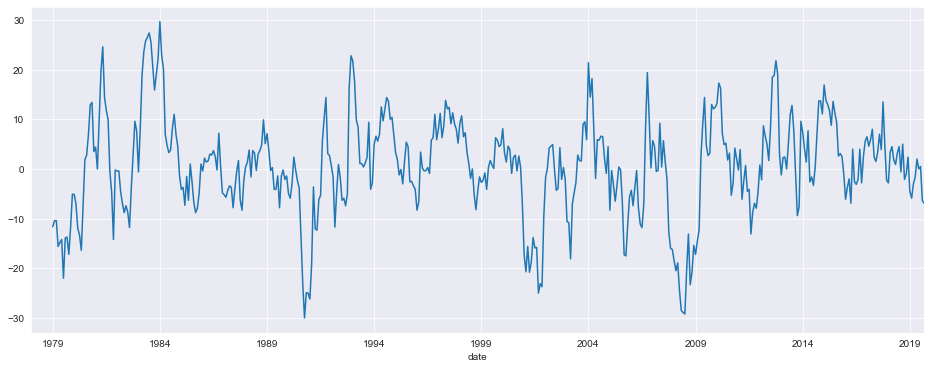

In [68]:
df1['y'].plot()
plt.show()

## After differencing, it seems closer to stationary, and there seems to be some autoregressive pattern in the data. Let's check ACF and PACF

## step 1, since we need to plot ACF and PACF of a process hundreds of times, let's write a function in stata to plot ACF and PACF altogether concisely.

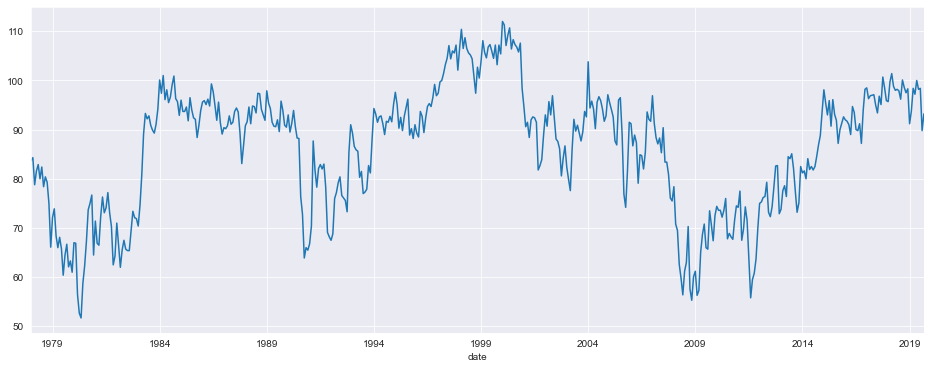

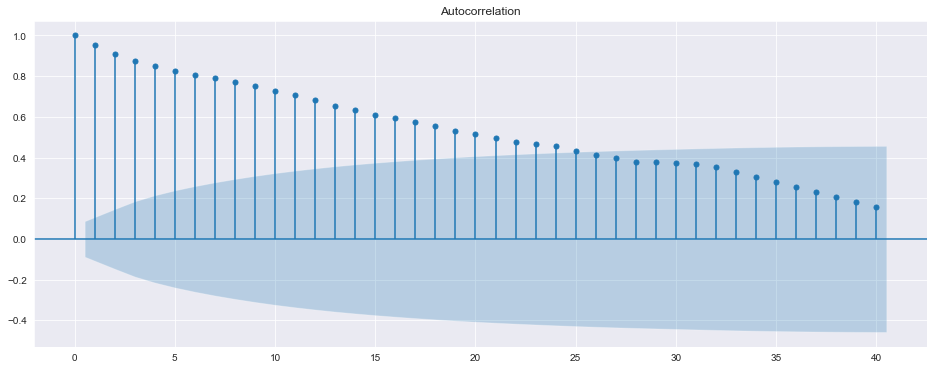

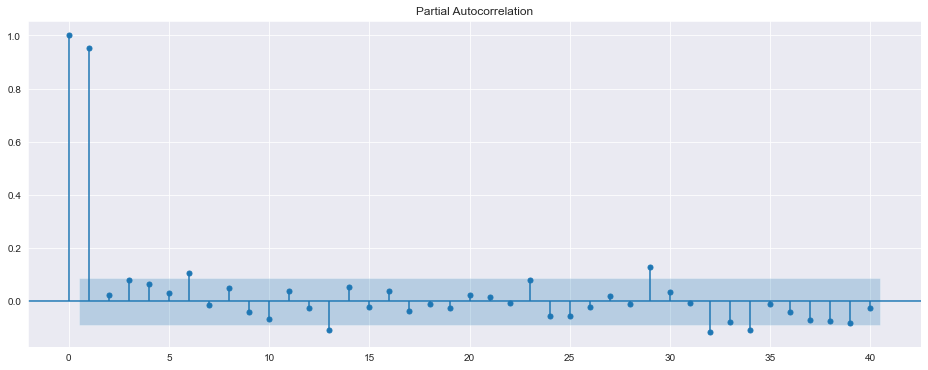

In [69]:
df['y'].plot()
    
sm.graphics.tsa.plot_acf(df['y'].values.squeeze(), lags=40)
    
sm.graphics.tsa.plot_pacf(df['y'].values.squeeze(), lags=40)
    
plt.show()

## ACF decays and PACF is strong at lag 1, 13 and other seasonal frequencies. so p=P=1 , q=Q=0 could be a place to start 

## In ths following steps, you will see how statisticians tried all their best to find a better model 60 years ago. Such method is called "blind search" in modern statistics and machine learning theory

## The reason we call it "blind search" is because you never know how to improve your model. You can only randomly toggle the value of p,q,P,Q and "pray" that you got lucky.

## As a benchmark of the "blind search", we typically starts from p=P=q=Q=0 (just a seasonal random walk).

## "blind search" is a horrible job. Typicaly you need to type walls of commands hundreds of times in order to find a slightly better (maybe still statistically insignificantlly) model

## To ease your pain, I summarize all the information you need in the following function: 

### * plot the time series, acf and pacf
### * run SARMIAX model 
### * report Ljung-Box test
### * plot a 2x2 diagnostic graph for prediction residual "e"

In [70]:
def sarima_est(df, p, d, q, P, D, Q, m):
    
    df['y'].plot()
    
    sm.graphics.tsa.plot_acf(df['y'].values.squeeze(), lags=40)
    
    sm.graphics.tsa.plot_pacf(df['y'].values.squeeze(), lags=40)
    
    plt.show()
    
    mod = sm.tsa.statespace.SARIMAX(df['y'], order=(p, d, q), seasonal_order=(P, D, Q, m), trend='c')
    
    res = mod.fit(disp=False)
    print(res.summary())
    
    res.plot_diagnostics()

# now we just need to specify p,d,q,P,D,Q,m (you need to strictly follow this order) of sarima as follows, the function will automatically report everything you need.

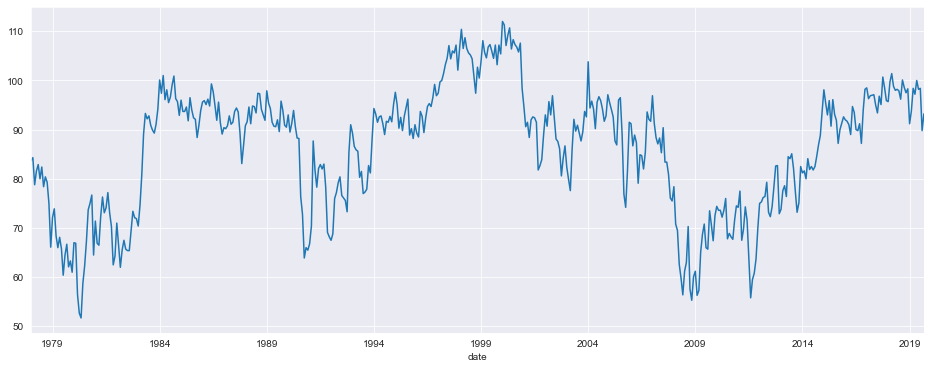

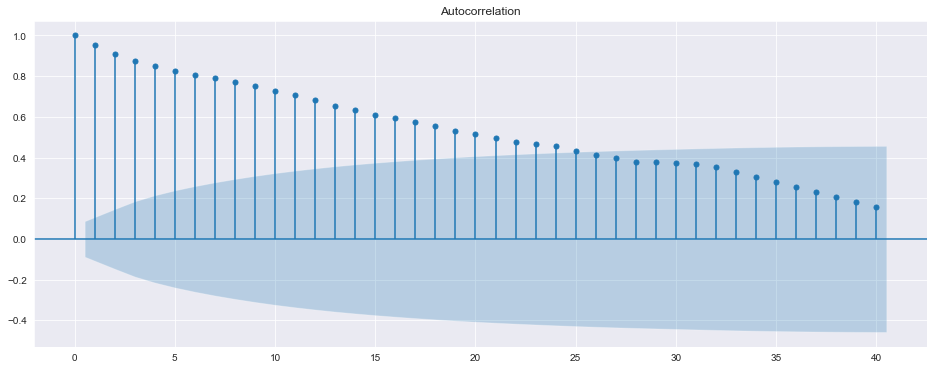

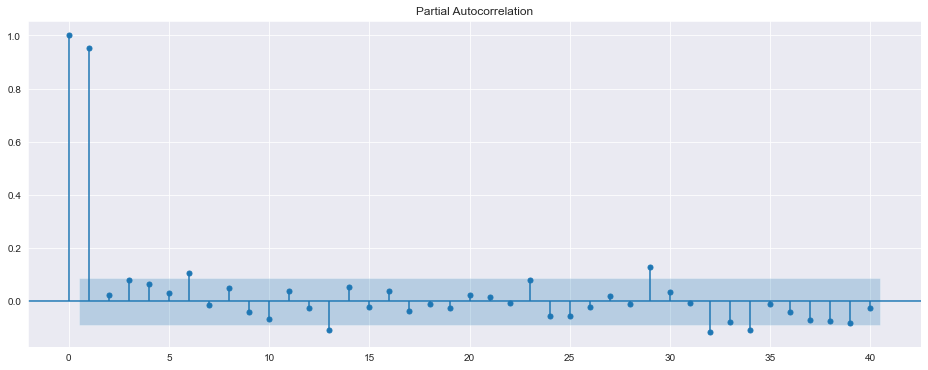

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                  501
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood               -1817.047
Date:                  Tue, 21 Sep 2021   AIC                           3638.094
Time:                          18:09:21   BIC                           3646.479
Sample:                      01-01-1978   HQIC                          3641.387
                           - 09-01-2019                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4125      0.454      0.909      0.363      -0.477       1.302
sigma2        98.8702      5.493     17.998      0.000      88.103     109.637
Ljung-Box (L1) (Q):                 

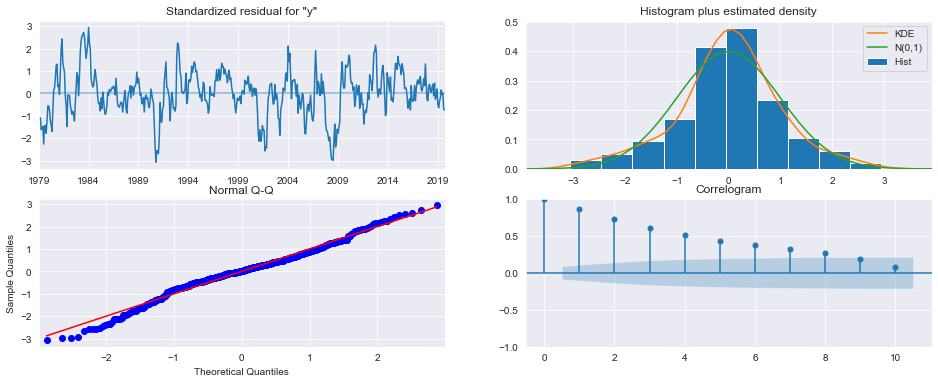

In [71]:
sarima_est(df, 0, 0, 0, 0, 1, 0, 12)

# I can guarantee that Python and Stata report exactly the same result in SARMIAX. Just note the in stata you see sigma; Python report the sqaure of the sigma, i.e., sigma2

# the result above is clearly not good enough.
# how much better is p=1 ? that's usually the main effect

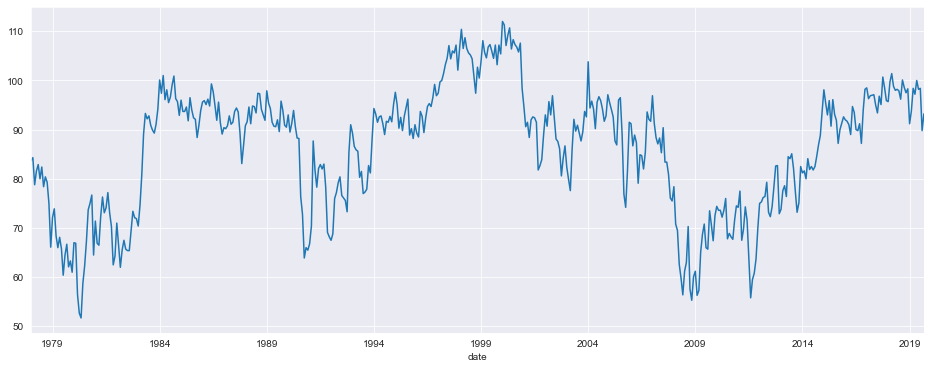

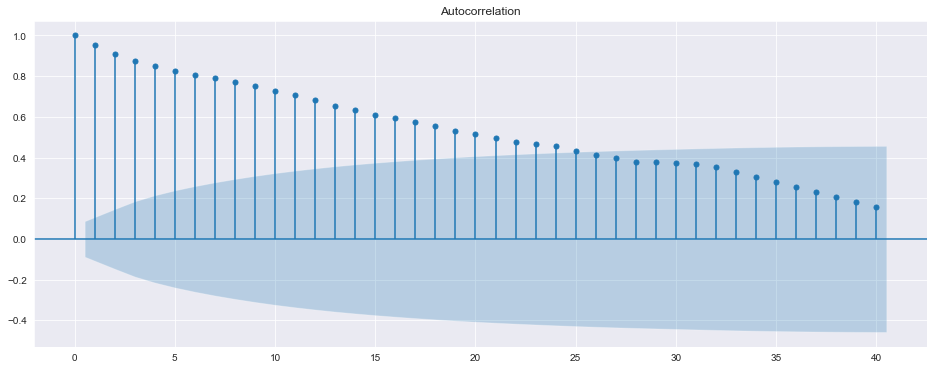

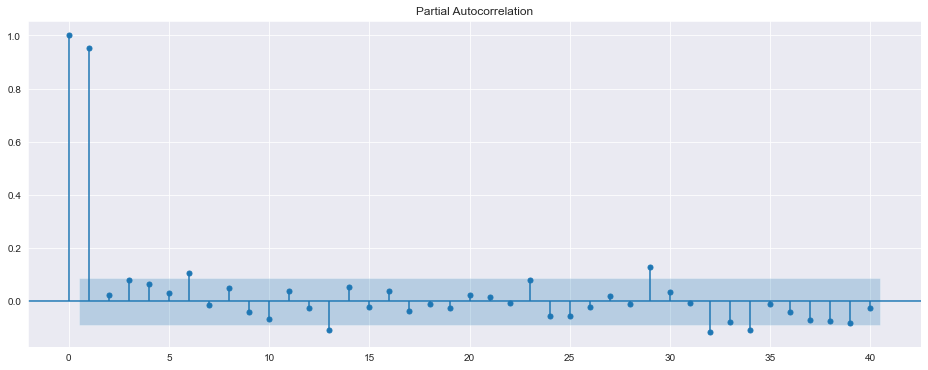

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  501
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood               -1486.023
Date:                            Tue, 21 Sep 2021   AIC                           2978.047
Time:                                    18:09:22   BIC                           2990.624
Sample:                                01-01-1978   HQIC                          2982.986
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0237      0.227      0.105      0.917      -0.421       0.468
ar.L1          0.8617      0.021   

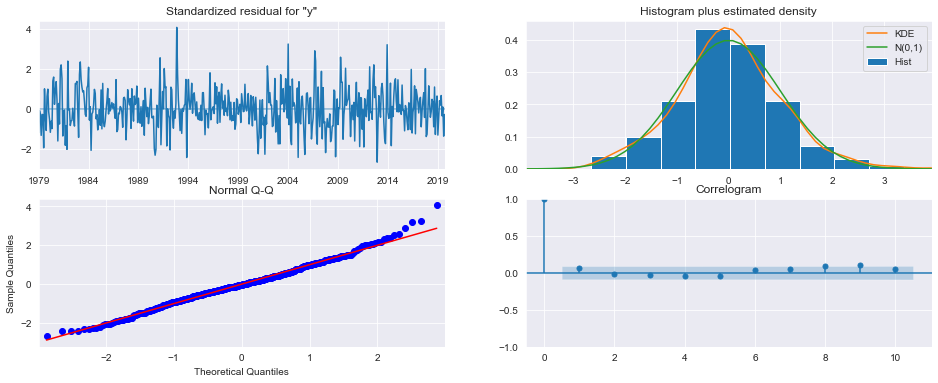

In [72]:
sarima_est(df, 1, 0, 0, 0, 1, 0, 12)

# pretty large and significant phi, as expected from those ACF and PACF plots
# but the Ljung-Box test result is not good enough. Let add P=1 leads to the following:

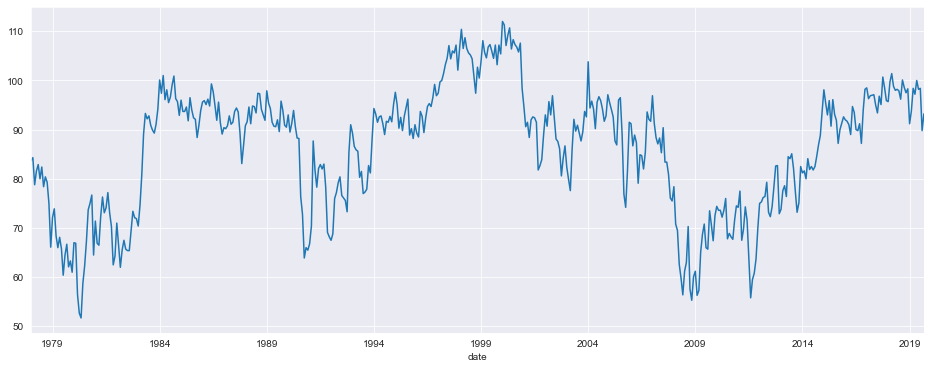

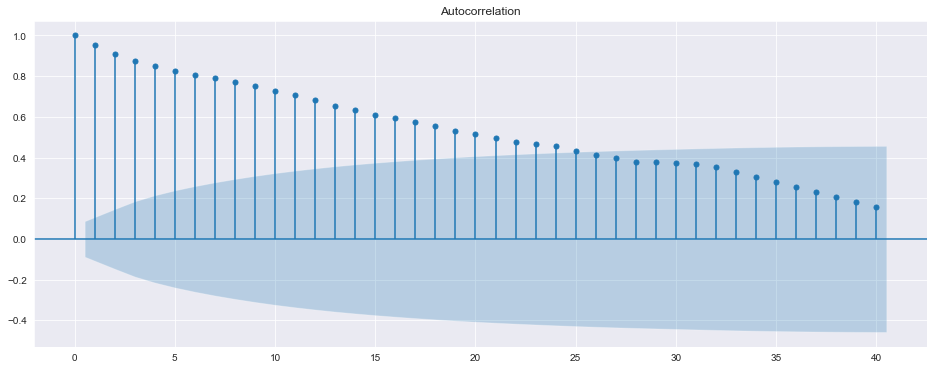

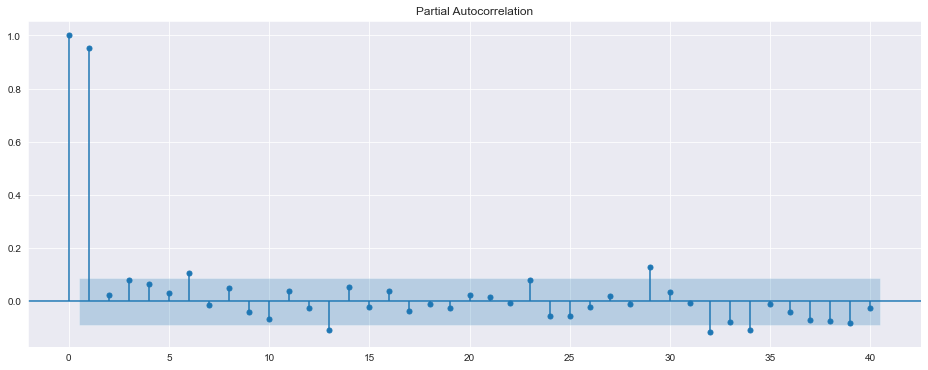

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  501
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood               -1425.452
Date:                            Tue, 21 Sep 2021   AIC                           2858.905
Time:                                    18:09:23   BIC                           2875.674
Sample:                                01-01-1978   HQIC                          2865.491
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0430      0.204      0.211      0.833      -0.357       0.443
ar.L1          0.9009      0.018   

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


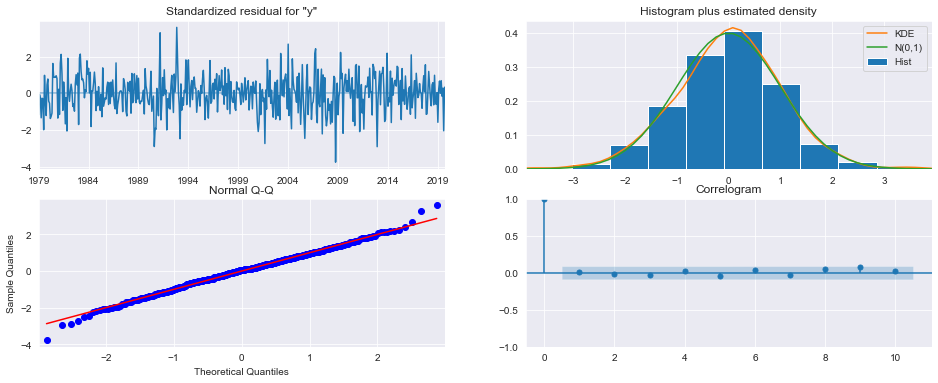

In [73]:
sarima_est(df, 1, 0, 0, 1, 1, 0, 12)

# another big improvement, but still the Ljung-Box test tells us we have a problem. what might that problem be? Let's focus on the 2x2 diagnostic plot for e

# clearly a periodical pattern in the correlogram, our P=1 should have caught those, but maybe also setting Q=1 helps

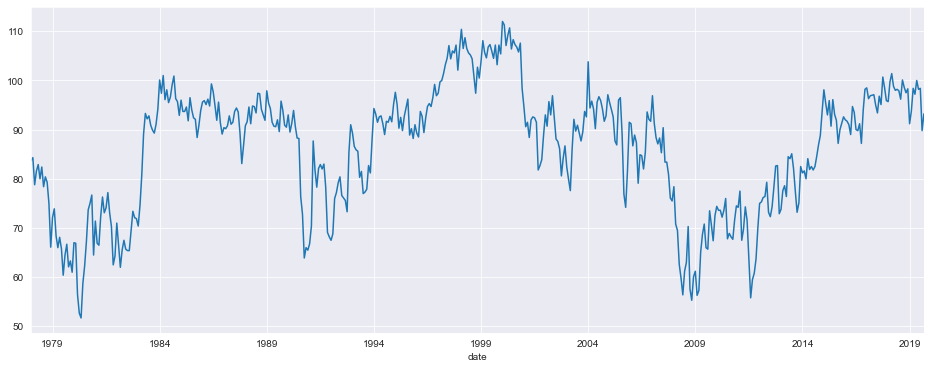

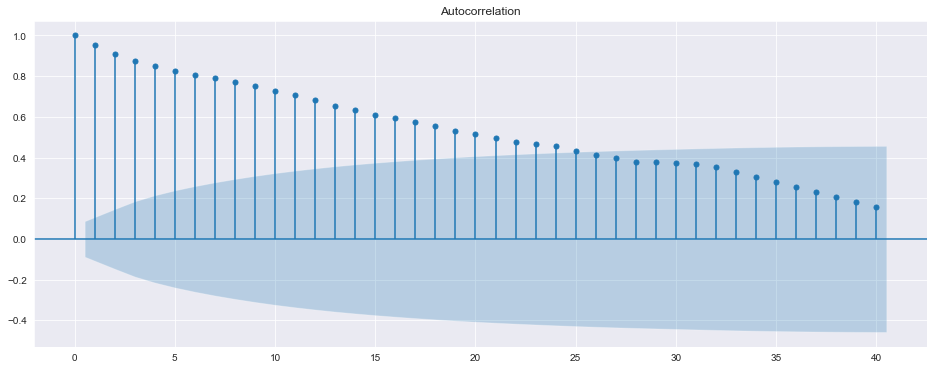

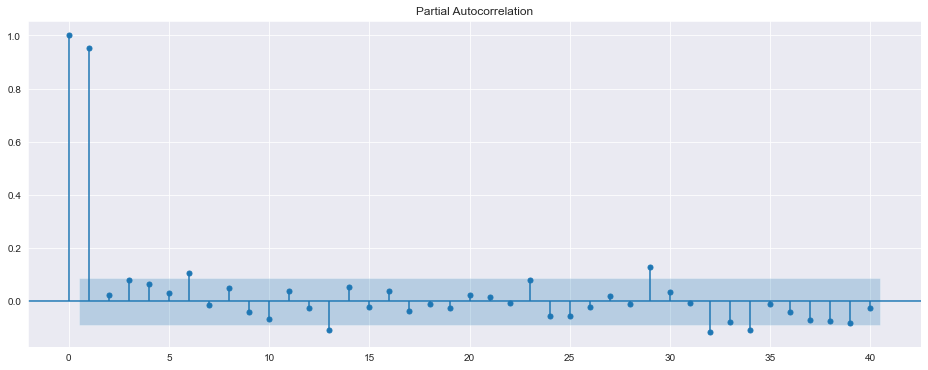

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  501
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood               -1366.396
Date:                              Tue, 21 Sep 2021   AIC                           2742.793
Time:                                      18:09:24   BIC                           2763.755
Sample:                                  01-01-1978   HQIC                          2751.026
                                       - 09-01-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0080      0.014      0.563      0.574      -0.020       0.036
ar.L1          0.94

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


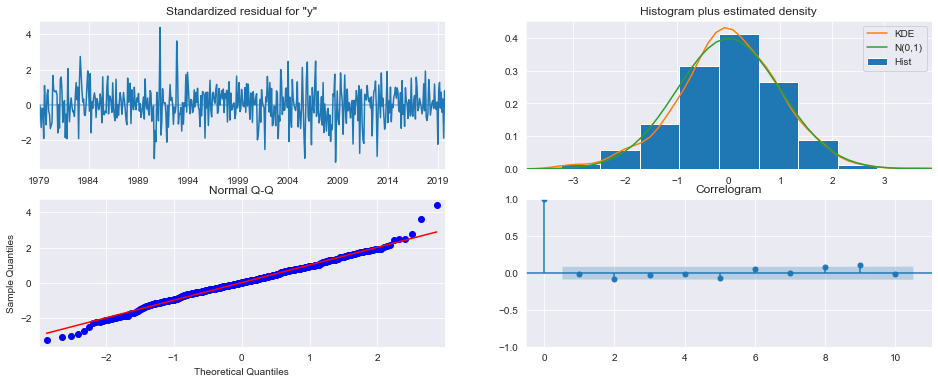

In [74]:
sarima_est(df, 1, 0, 0, 1, 1, 1, 12)

# getting better... but we may still be able to improve
# let's check the correlogram plot of e again

# our main problem is at lag 9. not sure what that would mean. maybe just fiddling with the model a bit more can help... note that after adding that SMA term, the SAR term became insignificant, so maybe we can just leave it out?

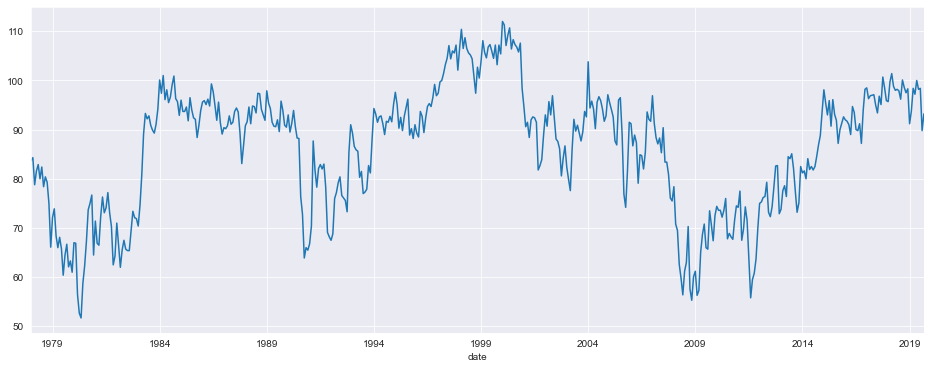

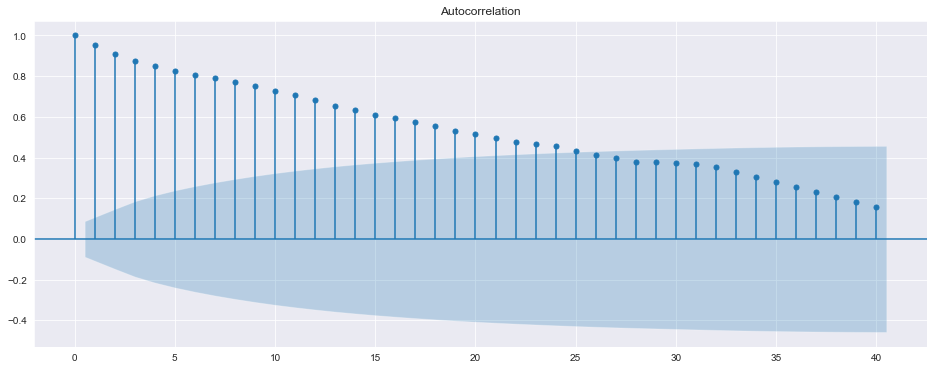

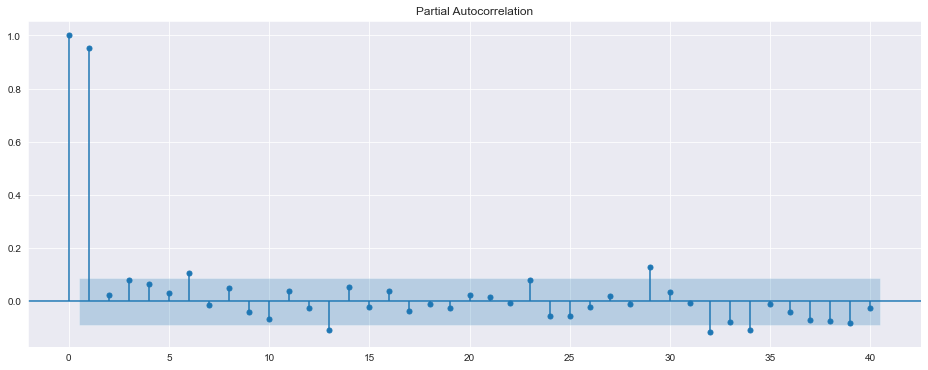

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  501
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood               -1367.640
Date:                              Tue, 21 Sep 2021   AIC                           2743.281
Time:                                      18:09:25   BIC                           2760.050
Sample:                                  01-01-1978   HQIC                          2749.867
                                       - 09-01-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0091      0.017      0.549      0.583      -0.023       0.042
ar.L1          0.95

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


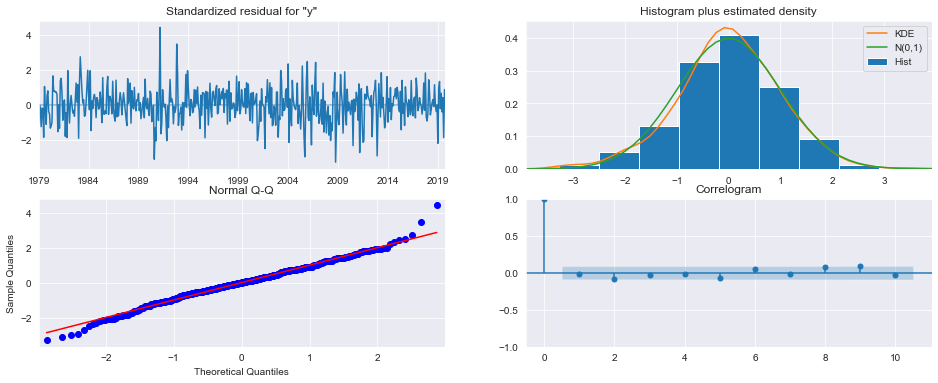

In [75]:
sarima_est(df, 1, 0, 0, 0, 1, 1, 12)

# the BIC keeps improving, and Ljung and Box are happy too. okay, let's run with this model


In [76]:
p = 1; d = 0; q = 0; P = 0; D = 1; Q = 1; m = 12;

mod = sm.tsa.statespace.SARIMAX(df['y'], order=(p, d, q), seasonal_order=(P, D, Q, m), trend='c')
    
res = mod.fit(disp=False)
print(res.summary())

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  501
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood               -1367.640
Date:                              Tue, 21 Sep 2021   AIC                           2743.281
Time:                                      18:09:26   BIC                           2760.050
Sample:                                  01-01-1978   HQIC                          2749.867
                                       - 09-01-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0091      0.017      0.549      0.583      -0.023       0.042
ar.L1          0.95

# let's calculate forecasts

In [77]:
fcast = res.get_forecast(39)
print('Forecast:')
pd.DataFrame(fcast.predicted_mean)

Forecast:


,predicted_mean
2019-10-01,92.259399
2019-11-01,92.837125
2019-12-01,93.860644
2020-01-01,94.956425
2020-02-01,94.019480
2020-03-01,93.759179
2020-04-01,93.554499
2020-05-01,94.108194
2020-06-01,94.029761
2020-07-01,92.954028


In [78]:
print('Confidence intervals:')
fcast.conf_int()

Confidence intervals:


,lower y,upper y
2019-10-01,84.690674,99.828124
2019-11-01,82.377122,103.297128
2019-12-01,81.336973,106.384314
2020-01-01,80.814294,109.098555
2020-02-01,78.551069,109.487891
2020-03-01,77.175833,110.342526
2020-04-01,76.018110,111.090888
2020-05-01,75.747531,112.468857
2020-06-01,74.949985,113.109537
2020-07-01,73.242701,112.665355


# plot them in a graph

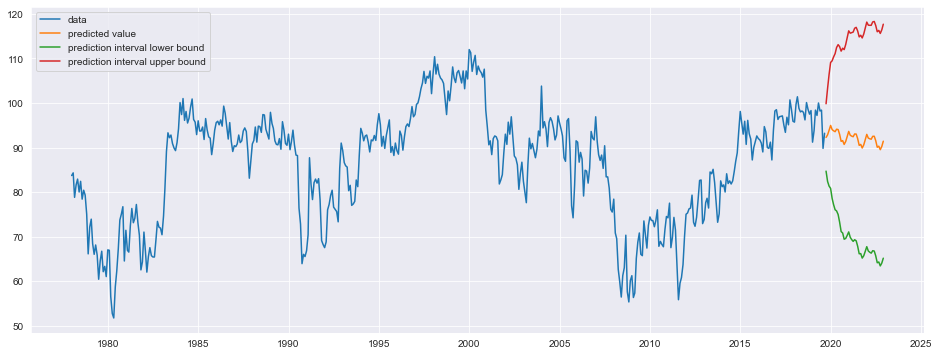

In [79]:
fig = plt.figure

plt.plot(df['y'], label = "data")
plt.plot(fcast.predicted_mean, label = "predicted value")
plt.plot(fcast.conf_int()['lower y'], label = "prediction interval lower bound")
plt.plot(fcast.conf_int()['upper y'], label = "prediction interval upper bound")

plt.legend()
plt.show()

# fairly wide confidence bands... but that's what you get for nonstationary models (recall the HEGY12 test, we have 2 non-rejections)

# now, let's see what OLS can do for us. unfortunately there is no obvious shape to the trend, so we could use higher-order polynomials. we have plenty of data, so we can simply start high and work back from there:

In [80]:
df = pd.read_excel('cons_conf.xlsx')
df = df.rename(columns={"University of Michigan consumer confidence index": "y"})

df.drop(['month'], axis=1, inplace=True)

df.tail()

,y
496,100.0
497,98.2
498,98.4
499,89.8
500,93.2


In [81]:
df['t']   = np.arange(1,df['y'].shape[0]+1,1)
df['t2']  = np.power(df['t'],2)
df['t3']  = np.power(df['t'],3)
df['t4']  = np.power(df['t'],4)
df['t5']  = np.power(df['t'],5)
df['t6']  = np.power(df['t'],6)
df['t7']  = np.power(df['t'],7)
df['t8']  = np.power(df['t'],8)
df['t9']  = np.power(df['t'],9)
df['t10'] = np.power(df['t'],10)
df['sin10']   = np.sin(2 * np.pi * df.t / 120)
df['cos10']   = np.cos(2 * np.pi * df.t / 120)
df['sinyear'] = np.sin(2* np.pi * df.t / 12)
df['cosyear'] = np.cos(2* np.pi * df.t / 12)

df=(df-df.mean())/df.std()

round(df.describe(),3)

df['month'] = pd.Series(np.tile(np.arange(1,13), int(np.ceil(df.shape[0]/12))), dtype="string")

df['month'] = "m" + df['month']
dummies = pd.get_dummies(df['month'])
df = pd.concat([df, dummies], axis=1)

In [82]:
df.describe()

,y,t,t2,t3,t4,t5,t6,t7,t8,t9,...,m11,m12,m2,m3,m4,m5,m6,m7,m8,m9
count,5.010000e+02,501.000000,5.010000e+02,501.000000,5.010000e+02,501.000000,5.010000e+02,501.000000,5.010000e+02,5.010000e+02,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,-6.807595e-16,0.000000,-1.134599e-16,0.000000,1.134599e-16,0.000000,2.836498e-16,0.000000,-7.091245e-18,8.864056e-18,...,0.081836,0.081836,0.083832,0.083832,0.083832,0.083832,0.083832,0.083832,0.083832,0.083832
std,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,...,0.274389,0.274389,0.277413,0.277413,0.277413,0.277413,0.277413,0.277413,0.277413,0.277413
min,-2.731615e+00,-1.726871,-1.118161e+00,-0.881821,-7.498385e-01,-0.663143,-6.007378e-01,-0.553097,-2.207830e+00,-2.001353e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.785472e-01,-0.863436,-9.066319e-01,-0.825934,-7.349139e-01,-0.659163,-5.996811e-01,-0.552818,-3.271910e-01,-7.055656e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.810118e-01,0.000000,-2.787074e-01,-0.440030,-5.148119e-01,-0.538306,-5.347035e-01,-0.518321,-6.121346e-02,-1.005207e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.921840e-01,0.863436,7.656126e-01,0.603289,4.336760e-01,0.278556,1.454605e-01,0.035585,5.181305e-01,7.526100e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.036401e+00,1.726871,2.226328e+00,2.631423,2.980714e+00,3.291991,3.575195e+00,3.836550,2.075148e+00,1.770934e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# let's firstly try the polynomial regression

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     92.18
Date:                Tue, 21 Sep 2021   Prob (F-statistic):          7.22e-106
Time:                        18:09:26   Log-Likelihood:                -445.30
No. Observations:                 501   AIC:                             912.6
Df Residuals:                     490   BIC:                             959.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.68e-16      0.027  -2.51e-14      1.0

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


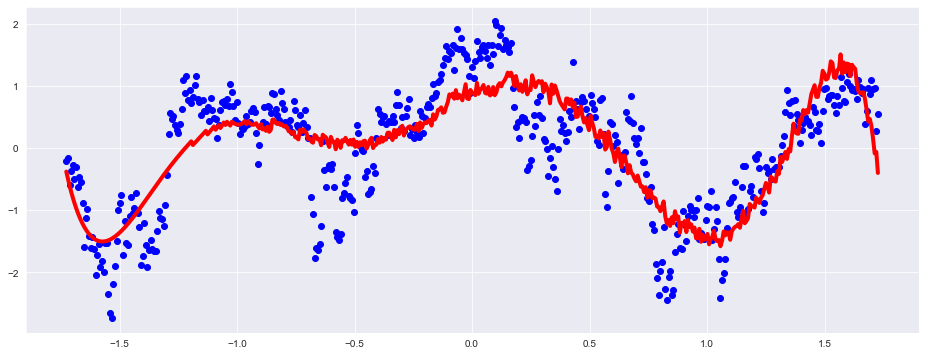

In [83]:
xp = df[['t', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']]
xp = sm.add_constant(xp)

model = sm.OLS(df['y'], xp, missing='drop').fit()
ypred10 = model.predict(xp) 

print(model.summary())

plt.scatter(df.t,df.y, color='blue')
plt.plot(df.t,ypred10, color='red', linewidth=4)

# BIC is unacceptbly huge; let's try drop t10

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     102.4
Date:                Tue, 21 Sep 2021   Prob (F-statistic):          1.02e-106
Time:                        18:09:26   Log-Likelihood:                -445.69
No. Observations:                 501   AIC:                             911.4
Df Residuals:                     491   BIC:                             953.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.68e-16      0.027  -2.51e-14      1.0

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


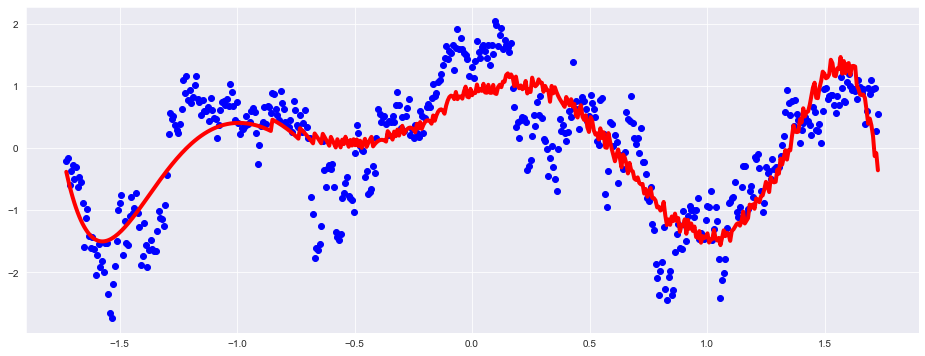

In [84]:
xp = df[['t', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9']]
xp = sm.add_constant(xp)

model = sm.OLS(df['y'], xp).fit()
ypred9 = model.predict(xp) 

print(model.summary())

plt.scatter(df.t,df.y, color='blue')
plt.plot(df.t,ypred9, color='red', linewidth=4)

# BIC gets better; let's try drop t9

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     114.1
Date:                Tue, 21 Sep 2021   Prob (F-statistic):          5.74e-107
Time:                        18:09:26   Log-Likelihood:                -447.58
No. Observations:                 501   AIC:                             913.2
Df Residuals:                     492   BIC:                             951.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.68e-16      0.027  -2.51e-14      1.0

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


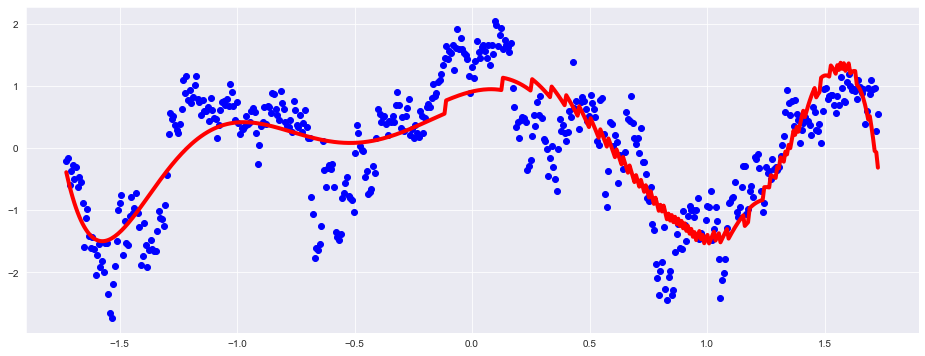

In [85]:
xp = df[['t', 't2', 't3', 't4', 't5', 't6', 't7', 't8']]

xp = sm.add_constant(xp)

model = sm.OLS(df['y'], xp).fit()
ypred8 = model.predict(xp) 

print(model.summary())

plt.scatter(df.t,df.y, color='blue')
plt.plot(df.t,ypred8, color='red', linewidth=4)

# BIC gets better; let's try drop t8

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     114.1
Date:                Tue, 21 Sep 2021   Prob (F-statistic):          5.74e-107
Time:                        18:09:26   Log-Likelihood:                -447.58
No. Observations:                 501   AIC:                             913.2
Df Residuals:                     492   BIC:                             951.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.68e-16      0.027  -2.51e-14      1.0

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


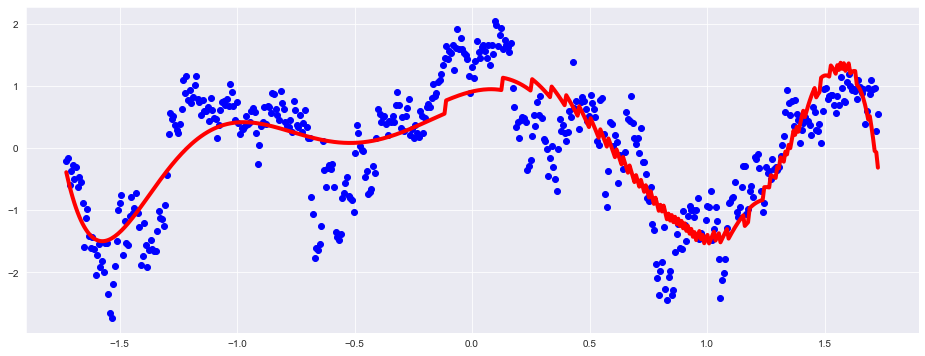

In [86]:
xp = df[['t', 't2', 't3', 't4', 't5', 't6', 't7', 't8']]

xp = sm.add_constant(xp)

model = sm.OLS(df['y'], xp).fit()
ypred7 = model.predict(xp) 

print(model.summary())

plt.scatter(df.t,df.y, color='blue')
plt.plot(df.t,ypred7, color='red', linewidth=4)

# BIC gets better; let's try drop t7

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     63.67
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           2.11e-58
Time:                        18:09:26   Log-Likelihood:                -566.89
No. Observations:                 501   AIC:                             1148.
Df Residuals:                     494   BIC:                             1177.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.68e-16      0.034  -1.98e-14      1.0

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


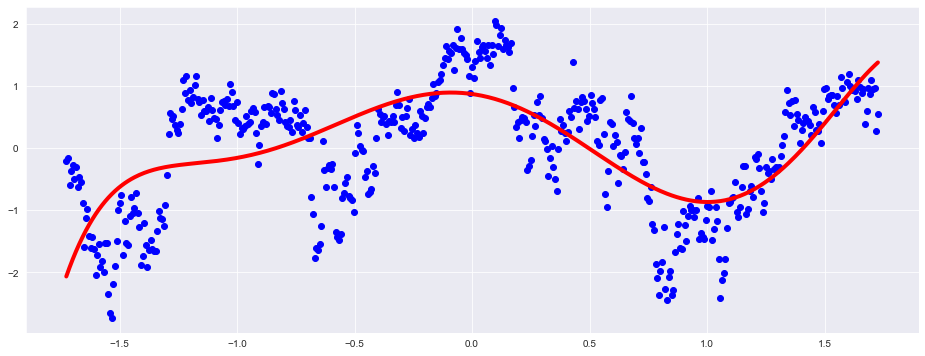

In [87]:
xp = df[['t', 't2', 't3', 't4', 't5', 't6']]
xp = sm.add_constant(xp)

model = sm.OLS(df['y'], xp).fit()
ypred6= model.predict(xp) 

print(model.summary())

plt.scatter(df.t,df.y, color='blue')
plt.plot(df.t,ypred6, color='red', linewidth=4)

# BIC stop improving; actually all four predictions above looks extremely similar

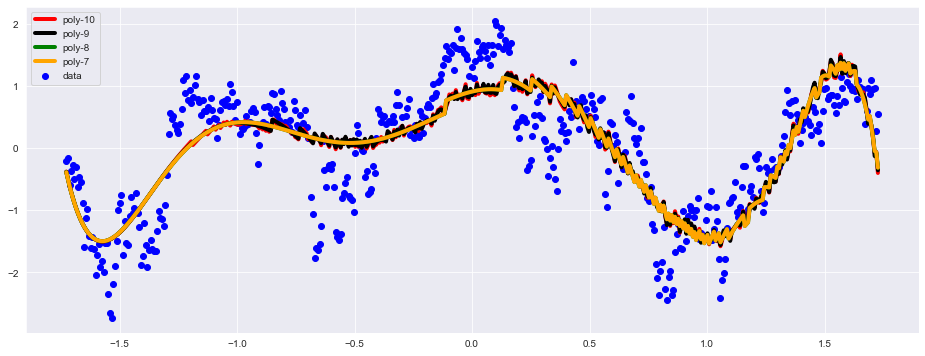

In [88]:
plt.scatter(df.t,df.y, color='blue', label='data')
plt.plot(df.t,ypred10, color='red', linewidth=4, label='poly-10')
plt.plot(df.t,ypred9, color='black', linewidth=4, label='poly-9')
plt.plot(df.t,ypred8, color='green', linewidth=4, label='poly-8')
plt.plot(df.t,ypred7, color='orange', linewidth=4, label='poly-7')

plt.legend()

# to modle cycle, let's add trignametric function with period = 10 years (or 120 months)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     63.77
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           2.21e-25
Time:                        18:09:26   Log-Likelihood:                -653.27
No. Observations:                 501   AIC:                             1313.
Df Residuals:                     498   BIC:                             1325.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.68e-16      0.040  -1.67e-14      1.0

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


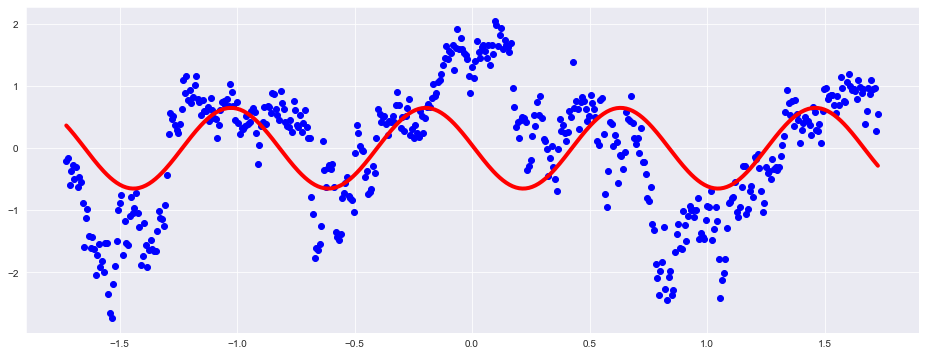

In [89]:
xp = df[['sin10', 'cos10']]

xp = sm.add_constant(xp)

model = sm.OLS(df['y'], xp).fit()
ypred7 = model.predict(xp) 

print(model.summary())

plt.scatter(df.t,df.y, color='blue')
plt.plot(df.t,ypred7, color='red', linewidth=4)

# this seems worse than ever, let's try add a t

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     43.47
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           5.84e-25
Time:                        18:09:26   Log-Likelihood:                -652.02
No. Observations:                 501   AIC:                             1312.
Df Residuals:                     497   BIC:                             1329.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.68e-16      0.040  -1.67e-14      1.0

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


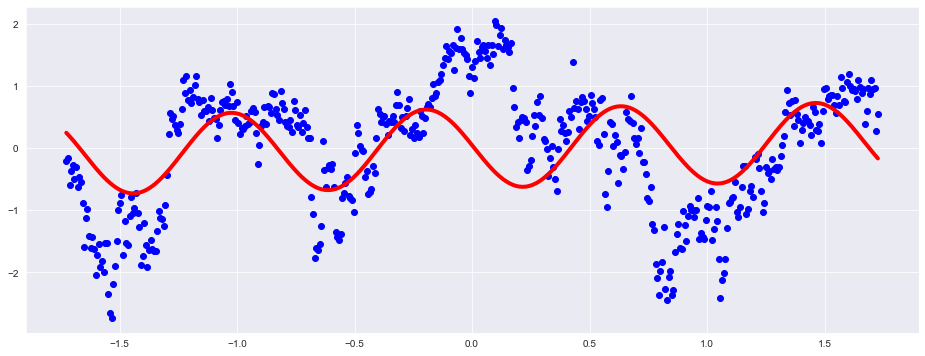

In [90]:
xp = df[['sin10', 'cos10','t']]

xp = sm.add_constant(xp)

model = sm.OLS(df['y'], xp).fit()
ypred7 = model.predict(xp) 

print(model.summary())

plt.scatter(df.t,df.y, color='blue')
plt.plot(df.t,ypred7, color='red', linewidth=4)

# the BIC keeps increasing, which suggests that it doesn't even want a time trend any more...?

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     50.82
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           7.40e-36
Time:                        18:09:27   Log-Likelihood:                -624.35
No. Observations:                 501   AIC:                             1259.
Df Residuals:                     496   BIC:                             1280.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.68e-16      0.038  -1.77e-14      1.0

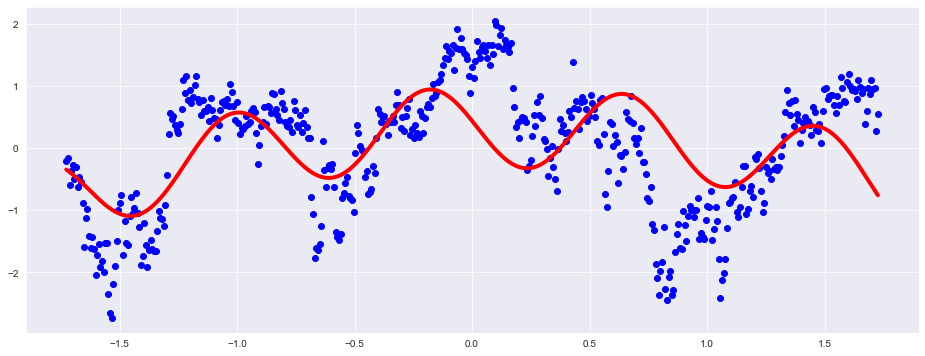

In [91]:
xp = df[['sin10', 'cos10','t','t2']]

xp = sm.add_constant(xp)

model = sm.OLS(df['y'], xp).fit()
ypred7 = model.predict(xp) 

print(model.summary())

plt.scatter(df.t,df.y, color='blue')
plt.plot(df.t,ypred7, color='red', linewidth=4)

# okay, so it does, just not a linear trend

# we may have sacrificed a bit too much in terms of fit (R2)... let's try add a third-order term?

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     76.81
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           1.61e-59
Time:                        18:09:27   Log-Likelihood:                -566.54
No. Observations:                 501   AIC:                             1145.
Df Residuals:                     495   BIC:                             1170.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.68e-16      0.034  -1.98e-14      1.0

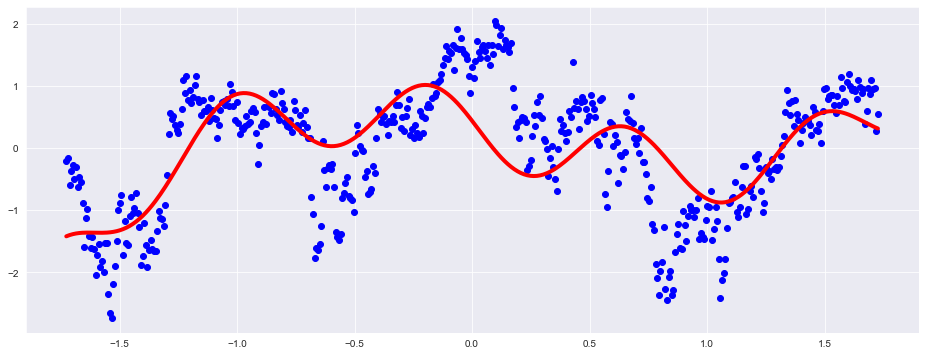

In [92]:
xp = df[['sin10', 'cos10','t','t2','t3']]

xp = sm.add_constant(xp)

model = sm.OLS(df['y'], xp).fit()
ypred7 = model.predict(xp) 

print(model.summary())

plt.scatter(df.t,df.y, color='blue')
plt.plot(df.t,ypred7, color='red', linewidth=4)

# That's better. test a fourth-order term for good measure

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     91.89
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           3.38e-77
Time:                        18:09:27   Log-Likelihood:                -522.62
No. Observations:                 501   AIC:                             1059.
Df Residuals:                     494   BIC:                             1089.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.68e-16      0.031  -2.16e-14      1.0

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


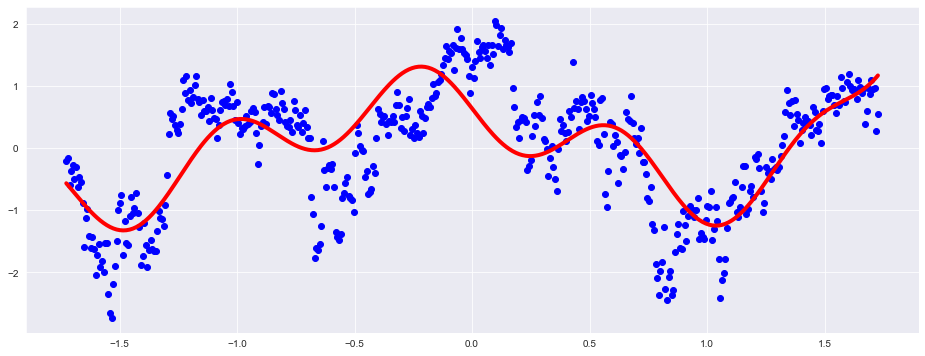

In [93]:
xp = df[['sin10', 'cos10','t','t2','t3','t4']]

xp = sm.add_constant(xp)

model = sm.OLS(df['y'], xp).fit()
ypred7 = model.predict(xp) 

print(model.summary())

plt.scatter(df.t,df.y, color='blue')
plt.plot(df.t,ypred7, color='red', linewidth=4)

# very significant! and a strong improvement in the BIC

# ok, let's do this one then, especially because of the better fit at the end of the sample - although the forecasts look suspiciously optimistic

# maybe also model some seasonality within the year?

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     69.51
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           6.13e-76
Time:                        18:09:27   Log-Likelihood:                -520.94
No. Observations:                 501   AIC:                             1060.
Df Residuals:                     492   BIC:                             1098.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.68e-16      0.031  -2.16e-14      1.0

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


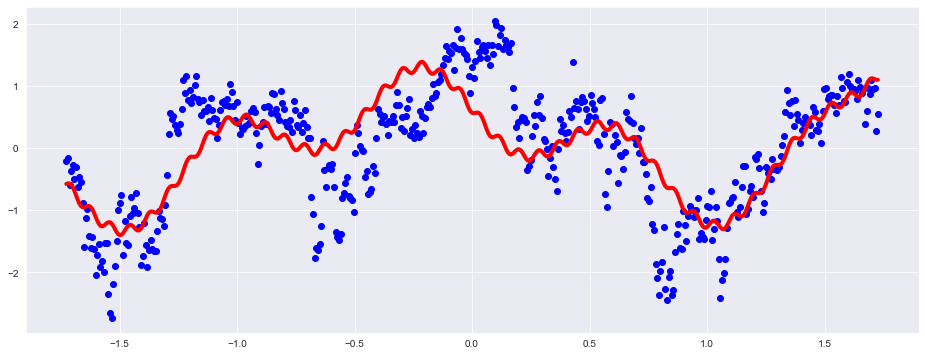

In [94]:
xp = df[['sin10', 'cos10','t','t2','t3','t4', 'sinyear', 'cosyear']]

xp = sm.add_constant(xp)

model = sm.OLS(df['y'], xp).fit()
ypred7 = model.predict(xp) 

print(model.summary())

plt.scatter(df.t,df.y, color='blue')
plt.plot(df.t,ypred7, color='red', linewidth=4)

# these two new variables are not even significant
# they are not helping here either. maybe we could use seasonal dummies instead?

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     32.37
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           9.54e-69
Time:                        18:09:27   Log-Likelihood:                -519.89
No. Observations:                 501   AIC:                             1076.
Df Residuals:                     483   BIC:                             1152.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0598      0.109     -0.550      0.5

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


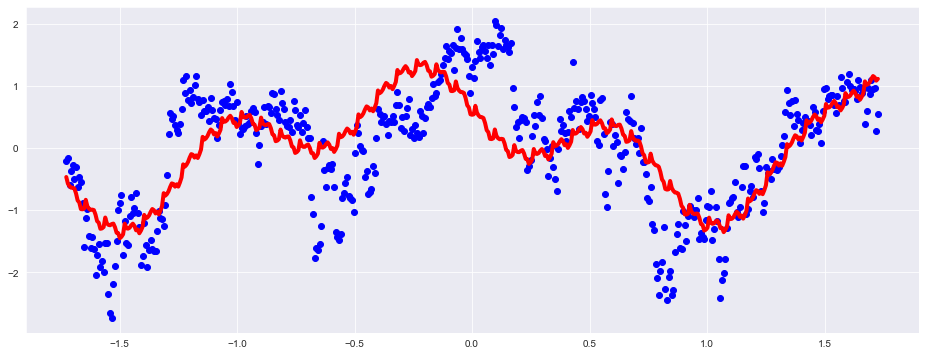

In [95]:
xp = df[['sin10', 'cos10','t','t2','t3','t4', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11']]

xp = sm.add_constant(xp)

model = sm.OLS(df['y'], xp).fit()
ypred7 = model.predict(xp) 

print(model.summary())

plt.scatter(df.t,df.y, color='blue')
plt.plot(df.t,ypred7, color='red', linewidth=4)

# none of monthly dummies are individually significant

In [96]:
print(model.f_test("m1=m2=m3=m4=m5=m6=m7=m8=m9=m10=m11=0"))

<F test: F=array([[0.48132888]]), p=0.9149724656054367, df_denom=483, df_num=11>


# monthly dummies are not jointly significant either and the BIC is horrible. okay, forget about modelling intra-year seasonality then. After a series of blind search, it seems that the best OLS model is as follows

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     91.89
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           3.38e-77
Time:                        18:09:27   Log-Likelihood:                -522.62
No. Observations:                 501   AIC:                             1059.
Df Residuals:                     494   BIC:                             1089.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.68e-16      0.031  -2.16e-14      1.0

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


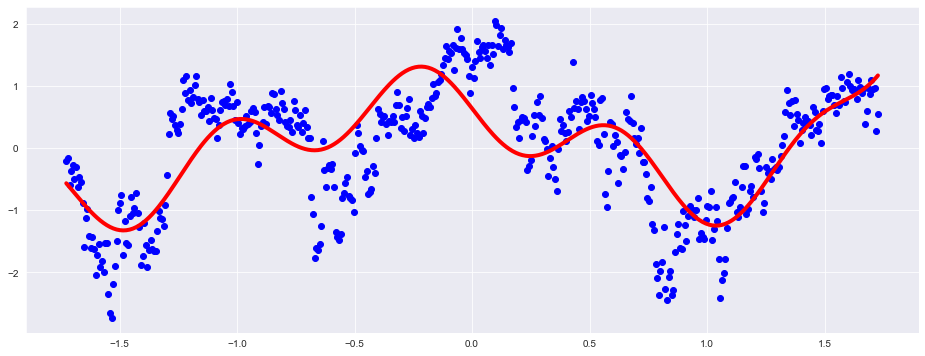

In [97]:
xp = df[['sin10', 'cos10','t','t2','t3','t4']]

xp = sm.add_constant(xp)

model = sm.OLS(df['y'], xp).fit()
ypred7 = model.predict(xp) 

print(model.summary())

plt.scatter(df.t,df.y, color='blue')
plt.plot(df.t,ypred7, color='red', linewidth=4)

# Now you can see the pain of "blind search". We need an algorithm for automated and systematical search for optimal model, which has been an active research area in machine learning.

In [100]:
!rm -rf W6_Python_Q4.html
!jupyter nbconvert --to html W6_Python_Q4.ipynb

[NbConvertApp] Converting notebook W6_Python_Q4.ipynb to html
[NbConvertApp] Writing 2926993 bytes to W6_Python_Q4.html
